In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Reading data into python

## 1 Read the "six-point-board-thickness.csv" file into Python. You will need to import some packages to use. Take a look through the dataframe to review.   

In [3]:
import numpy as np
import pandas as pd

In [4]:
all_boards = pd.read_csv('six-point-board-thickness.csv')
print(all_boards)

             Date.Time  Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0      2010-02-18 3:04  1761  1739  1758  1677  1684  1692
1      2010-02-18 3:37  1801  1688  1753  1741  1692  1675
2      2010-02-18 3:37  1697  1682  1663  1671  1685  1651
3      2010-02-18 3:37  1679  1712  1672  1703  1683  1674
4      2010-02-18 3:37  1699  1688  1699  1678  1688  1705
...                ...   ...   ...   ...   ...   ...   ...
4995  2010-02-18 13:15  1690  1701  1690  1694  1735  1695
4996  2010-02-18 13:15  1703  1674  1666  1694  1659  1728
4997  2010-02-18 13:16  1657  1667  1675  1654  1648  1609
4998  2010-02-18 13:16  1746  1717  1638  1723  1703  1706
4999  2010-02-18 13:16  1668  1680  1668  1669  1651  1629

[5000 rows x 7 columns]


## 2 Explore the dataframe and summarize the dataframe.  What are the 3 attributes and 3 components of the dataframe? Are there any missing values?

type(all_boards)  
len(all_boards)  
all_boards.shape  
all_boards.ndim  
all_boards.size  
all_boards.columns  
all_boards.index  
all_boards.info()  
all_boards.to_numpy()  
all_boards.head()
all_boards.describe()
all_boards.dtypes

In [5]:
all_boards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date.Time  5000 non-null   object
 1   Pos1       5000 non-null   int64 
 2   Pos2       5000 non-null   int64 
 3   Pos3       5000 non-null   int64 
 4   Pos4       5000 non-null   int64 
 5   Pos5       5000 non-null   int64 
 6   Pos6       5000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


There are 3 attributes to describe the size of the dataframe:

The .shape attribute will show the dimensionality. The result is a tuple containing the number of rows and columns.
The .ndim atribute will show the number of dimensions of the dataframe.
The .size attribute will show the total number of values.

There are 3 components of the dataframe: This is what makes the arrangement of a data matrix tidy. First you should arrange, or tidy, or clean your data into the form that you want.

The columns names can be found with the .columns attribute.
The .index attribute returns the row labels
The .values attribute returns the dataframe values. You can also use the .to_numpy() to create a 2D values array.

## 3 What are the datatypes for the variables?  Are these the datatypes you want for the variables?
![](DataTypesTutorial1Figure.png)

In [6]:
all_boards.dtypes

Date.Time    object
Pos1          int64
Pos2          int64
Pos3          int64
Pos4          int64
Pos5          int64
Pos6          int64
dtype: object

## 4 Let's convert the Date.Time object type to a pandas datetime type so that we can use it in a time series plot

### to_datetime

all_boards["Date.Time"]=pd.to_datetime(all_boards["Date.Time"])

all_boards["time"]=all_boards["Date.Time"].dt.time

### .astype

all_boards["Date.Time"]=all_boards["Date.Time"].astype("datetime64")


In [7]:
all_boards["Date.Time"]=all_boards["Date.Time"].astype("datetime64")
all_boards.dtypes

Date.Time    datetime64[ns]
Pos1                  int64
Pos2                  int64
Pos3                  int64
Pos4                  int64
Pos5                  int64
Pos6                  int64
dtype: object

In [8]:
all_boards['Time'] = all_boards['Date.Time'].dt.time
all_boards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date.Time  5000 non-null   datetime64[ns]
 1   Pos1       5000 non-null   int64         
 2   Pos2       5000 non-null   int64         
 3   Pos3       5000 non-null   int64         
 4   Pos4       5000 non-null   int64         
 5   Pos5       5000 non-null   int64         
 6   Pos6       5000 non-null   int64         
 7   Time       5000 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 312.6+ KB


## 5 Plot a time series plot for Position 1 over time. 

Use:  
all_boards.plot("Time","Pos1")

<AxesSubplot:xlabel='Time'>

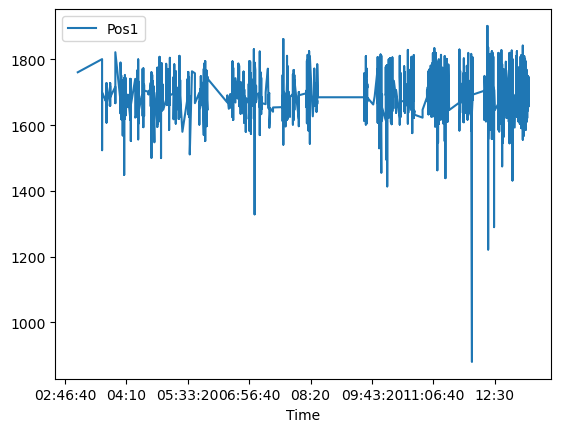

In [9]:
%matplotlib inline
all_boards.plot("Time","Pos1")

## 6 Drop the Time.Date and Time columns

In [10]:
boards_no_time = all_boards.drop(columns=["Date.Time","Time"])
print(boards_no_time)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0     1761  1739  1758  1677  1684  1692
1     1801  1688  1753  1741  1692  1675
2     1697  1682  1663  1671  1685  1651
3     1679  1712  1672  1703  1683  1674
4     1699  1688  1699  1678  1688  1705
...    ...   ...   ...   ...   ...   ...
4995  1690  1701  1690  1694  1735  1695
4996  1703  1674  1666  1694  1659  1728
4997  1657  1667  1675  1654  1648  1609
4998  1746  1717  1638  1723  1703  1706
4999  1668  1680  1668  1669  1651  1629

[5000 rows x 6 columns]


## 7 Filter the dataframe (all columns) that have less than 1650 mils for position 1:   pos1 < 1650


In [11]:
# Get all columns (the whole dataframe) with rows which have pos1 < 1650 mils
# Method 1 Square brackets column indexing 
less_1650_1 = boards_no_time[boards_no_time["Pos1"] < 1650]
print(less_1650_1)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
10    1546  1697  1654  1688  1668  1703
11    1524  1668  1594  1686  1741  1730
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[539 rows x 6 columns]


In [12]:
# Get all columns (the whole dataframe) with rows which have pos1 < 1650 mils
# Method 2 is using the location labeling of the dataframe. Using the .loc will enable you to select and slice more effeciently  
less_1650_2 = boards_no_time.loc[boards_no_time['Pos1'] < 1650]
print(less_1650_2)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
10    1546  1697  1654  1688  1668  1703
11    1524  1668  1594  1686  1741  1730
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[539 rows x 6 columns]


In [13]:
# Get all columns (the whole dataframe) with rows which have pos1 < 1650 mils
# Method 3 Use of the pandas .query function
less_1650_3=boards_no_time.query('Pos1 < 1650')
print(less_1650_3)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
10    1546  1697  1654  1688  1668  1703
11    1524  1668  1594  1686  1741  1730
23    1608  1664  1641  1651  1633  1594
48    1636  1650  1649  1666  1673  1665
55    1643  1649  1624  1667  1662  1660
...    ...   ...   ...   ...   ...   ...
4932  1632  1608  1634  1667  1674  1706
4933  1619  1692  1696  1711  1742  1728
4961  1622  1627  1641  1664  1663  1660
4969  1645  1680  1658  1747  1793  1808
4974  1648  1612  1620  1637  1611  1694

[539 rows x 6 columns]


## 8 Create a Barplot for thickness by position

import and use the plotting libraries, either matplotlib or seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
mean_mils=boards_no_time.mean()
print(mean_mils)

Pos1    1689.3934
Pos2    1680.9126
Pos3    1678.2108
Pos4    1687.3510
Pos5    1682.8952
Pos6    1681.5778
dtype: float64


Text(0, 0.5, 'Thickness (mils)')

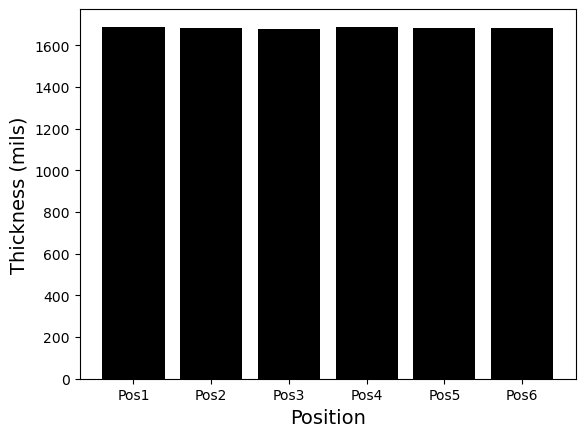

In [16]:
plt.bar(x=["Pos1","Pos2","Pos3","Pos4","Pos5","Pos6"],height=mean_mils,color='black')
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mils)", size=14)

C:\Users\carol\AppData\Local\Temp\ipykernel_14908\2544381630.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplotC = sns.barplot(data=boards_no_time, color="gray", ci='sd')


Text(0.5, 1.0, 'Boards Thickness by Position')

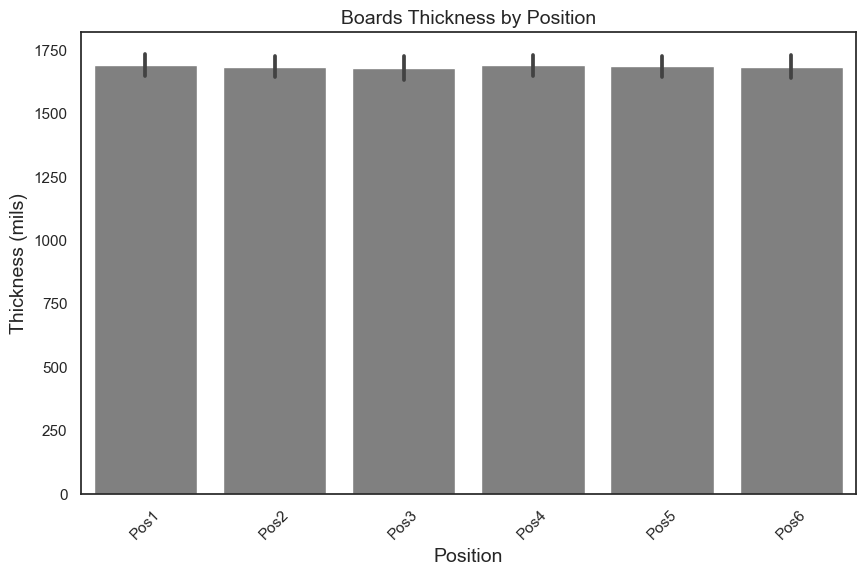

In [17]:
# Seaborn!.  Note the standard deviation added.
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style("white")
barplotC = sns.barplot(data=boards_no_time, color="gray", ci='sd')
barplotC.set_xticklabels(barplotC.get_xticklabels(), rotation=45)
barplotC.set_xlabel("Position", size=14)
barplotC.set_ylabel("Thickness (mils)", size=14)
barplotC.set_title("Boards Thickness by Position", size=14)

## 9 Create a Boxplot for thickness by position. Copy and paste the boxplot to a word document.   

For Position 1, identify the elements of the boxplot:  5 number summary and any outliers

Text(0, 0.5, 'Thickness (mils)')

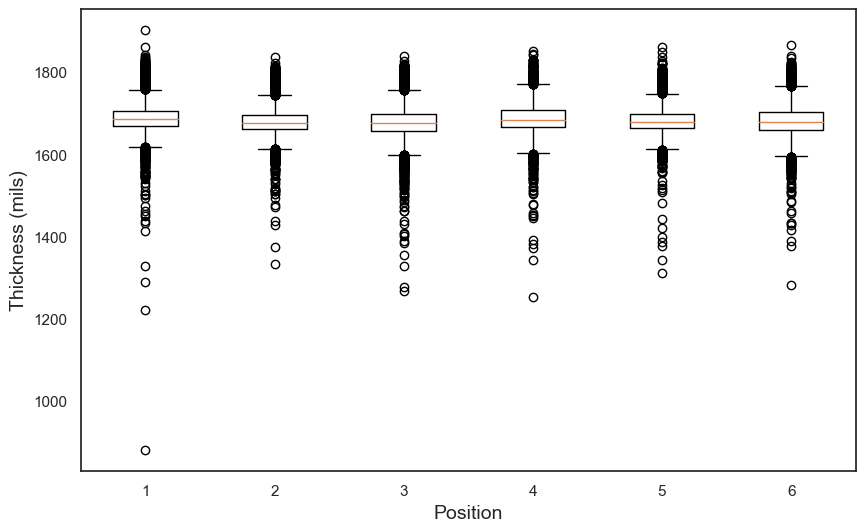

In [18]:
plt.boxplot(x=boards_no_time)
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mils)", size=14)

<AxesSubplot:>

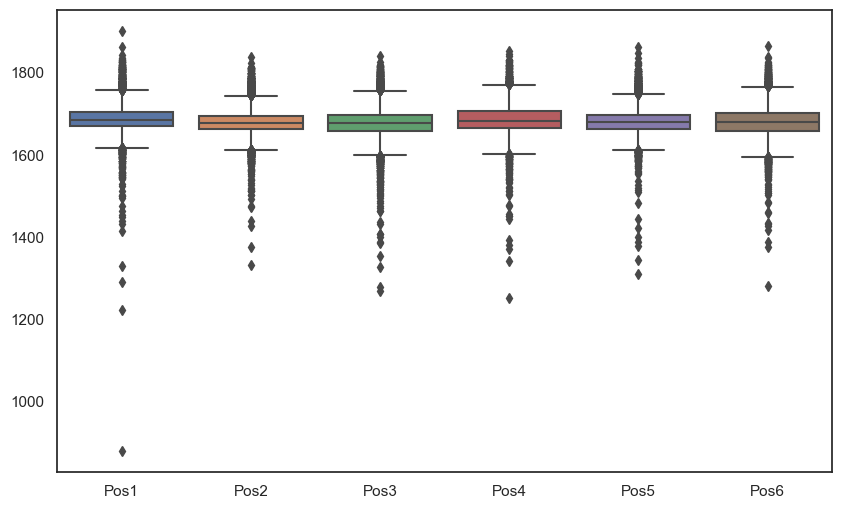

In [19]:
sns.boxplot(data=boards_no_time)
# click on the figure and use 'Create New View for Output' to copy and paste as a figure

In [20]:
boards_no_time["Pos1"].describe()
# 5 number summary:  min, max, Q1,Q2=median, Q3
# IQR = Q3-Q1
# outlier is anything beyond whisker boundaries = 1.5 * IQR
# whisker is put at the value in the data within the boundaries
# python uses linear interpolation to find values

count    5000.000000
mean     1689.393400
std        43.838524
min       880.000000
25%      1670.000000
50%      1685.000000
75%      1705.000000
max      1902.000000
Name: Pos1, dtype: float64

## 10 Find the sample mean and sample standard deviation of position 1.  Create a histogram of this distribution.

In [21]:
boards_no_time["Pos1"].mean()

1689.3934

In [22]:
np.mean(boards_no_time["Pos1"])

1689.3934

In [23]:
np.std(boards_no_time["Pos1"],ddof=1)

43.8385241503399

(870.0, 2000.0)

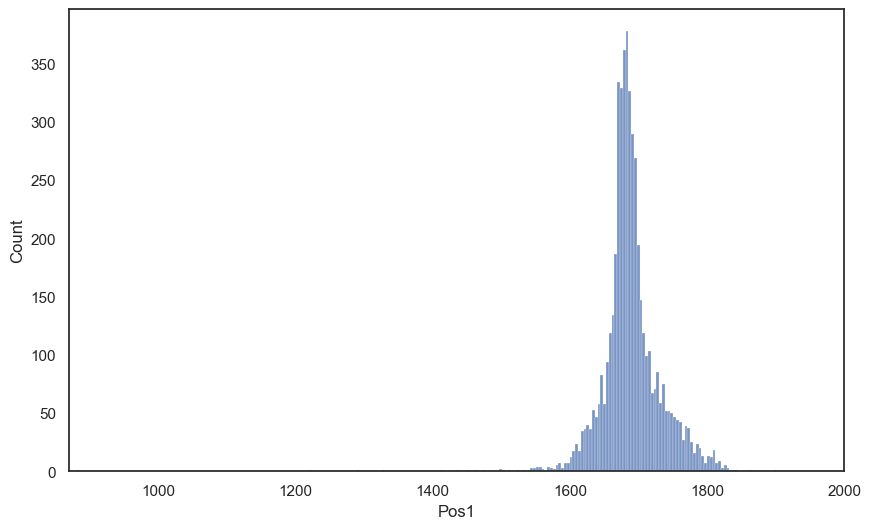

In [24]:
sns.histplot(data=boards_no_time["Pos1"],bins='auto')
plt.xlim(870,2000)

A histogram is a summary of the variation in a measured variable. 

It shows the number of samples that occur in a group of equal intervals (bins): this is called a frequency distribution.

Histograms give a rough sense of the density of the underlying distribution of the data
We will use histograms for estimating the probability distributions of variables.  

# Using seaborn to show all the columns as time series

matplotlib ipympl enables using the interactive features of matplotlib in Jupyter Notebooks, Jupyter Lab, Google Colab, VSCode notebooks, Google Colab

In [25]:
all_boards_sb=all_boards.drop(columns="Time")

In [26]:
# enable interactive widget for panning and zooming
%matplotlib widget
# create a dataframe that we can use with seaborn to show all columns on same time series graph
# the melt attribute changes the wide form of the dataframe to a long form that can then be used
# in seaborn to have the board thickness values for the y-values and shows all the board positions
# as differnt lines using hue.
dfm = all_boards_sb.melt("Date.Time", var_name='cols', value_name='vals')
dfm

,Date.Time,cols,vals
0,2010-02-18 03:04:00,Pos1,1761
1,2010-02-18 03:37:00,Pos1,1801
2,2010-02-18 03:37:00,Pos1,1697
3,2010-02-18 03:37:00,Pos1,1679
4,2010-02-18 03:37:00,Pos1,1699
...,...,...,...
29995,2010-02-18 13:15:00,Pos6,1695
29996,2010-02-18 13:15:00,Pos6,1728
29997,2010-02-18 13:16:00,Pos6,1609
29998,2010-02-18 13:16:00,Pos6,1706


<AxesSubplot:xlabel='Date.Time', ylabel='vals'>

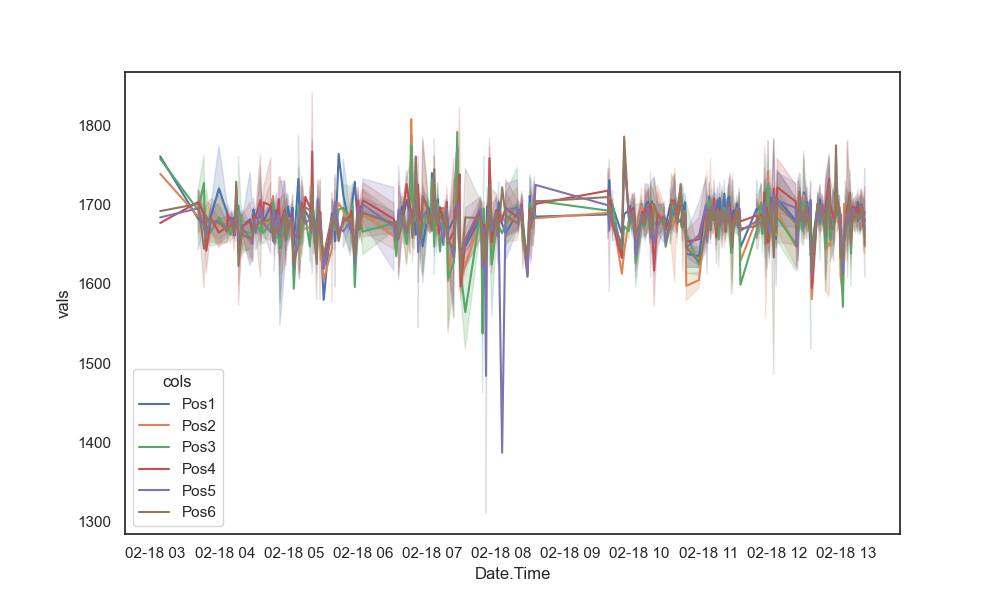

In [27]:
sns.lineplot(x="Date.Time",y="vals",hue="cols",data=dfm)